

# Introduction aux Processus Stochastiques (PRSTO)
*P. Carmona*

Pour avancer dans le notebook et exécuter les cellules il faut taper Shift+Enter ou utiliser la barre d'outils ci-dessus et choisir Cell, Run Cell and select Below

## Consignes

Vous répondrez aux  questions en modifiant ce notebook. En insérant des cellules de type Markdown pour le texte et des cellules de type code pour le code. 

Ensuite vous sauvez ce notebook sous le nom Prenom_Nom_tpmarkov.ipynb et vous le déposez sur Moodle

## Simulation d'une chaîne de Markov

Le langage Python dispose d'une fonction pour simuler suivant une loi discrète *rnd.choice*
On dispose d'une matrice de transition, par exemple celle modélisant le climat à Los Angeles.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.linalg import eig
%matplotlib inline

pla=np.array([[0.5,0.5],[0.1,0.9]])
pla
rnd.choice(a=2,p=pla[0])

1

On va simuler une chaîne de Markov de matrice de transition pla et issue de $2$.

De façon plus générale, le vecteur $x$ contiendra les n premières valeurs simulées d'une chaîne de Markov issue de 2.

In [2]:
n = 50
x = np.arange(n)
x[0] =1
dim=len(pla[0])
for i in np.arange(1,n):
    x[i]=rnd.choice(a=dim,p=pla[x[i-1]])

x

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1])

Ecrire une fonction 
  genmarkov(x,n,p) 
qui simule une chaîne de markov de matrice de transition p issue de $x$ et qui renvoie la valeur $X_{n-1}(\omega)$. On écrira également la fonction vgenmarkov qui elle renvoie le vecteur des valeurs $(X_0(\omega), ..., X_{n-1}(\omega))$.


In [3]:
def genmarkov(x, n, p):
    dim = len(p[0])
    y = np.arange(n)
    y[0] = x
    for i in range(1,n):
        y[i] = rnd.choice(a = dim, p = p[y[i-1]])
    return(y[-1])

#genmarkov(1, n, pla)

def vgenmarkov(x,n,p):
    dim = len(p[0])
    y = np.arange(n)
    y[0] = x
    for i in range(1,n):
        y[i] = rnd.choice(a = dim, p = p[y[i-1]])
    return(y)

vgenmarkov(1, n, pla)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

Pour le climat à Los Angeles, vérifiez que  la proportion de temps
passé dans chaque état converge vers un nombre qui ne dépend que de
cet état et pas du point de départ.

In [4]:
n=5000
z=vgenmarkov(1,n,pla)
print(z==0) #donne un vecteur de booleen
print((z==0).sum()) #donne le nombre de fois ou l'on est passe dans l'etat 0
print((z==0).mean()) #donne la moyenne empirique
print((z==0).cumsum()) #donne le vecteur des sommes cumulees
y=(z==0).cumsum()/np.arange(1,len(z)+1) #donne le vecteur des moyennes de 0
print(y)

[False False False ... False False False]
830
0.166
[  0   0   0 ... 830 830 830]
[0.         0.         0.         ... 0.16606643 0.16603321 0.166     ]


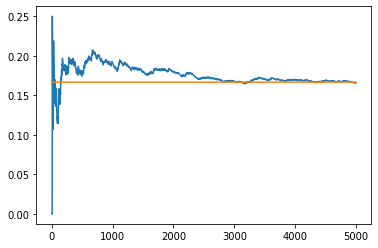

In [5]:
plt.plot(y)
plt.plot([1/6 for i in range(n)])

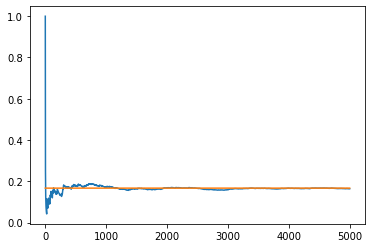

In [6]:
#on change le point de départ
n = 5000
z = vgenmarkov(0,n,pla)
y = (z==0).cumsum()/np.arange(1,len(z)+1) #donne le vecteur des moyennes de 0
plt.plot(y)
plt.plot([1/6 for i in range(n)])

On observe bien la convergence vers $1/6$ dans les deux cas.

 Ce résultat est-il encore vrai
pour les matrices p3 et p4 ci dessous ? Pouvez vous expliquer pourquoi ? 

<font color='blue'>
Ce résultat est encore vrai pour p3 mais pas pour p4 car celle-ci n'est pas irréductible. Par exemple, si on part de l'état 3 dans p4, on reste bloqué à cet état.
</font>

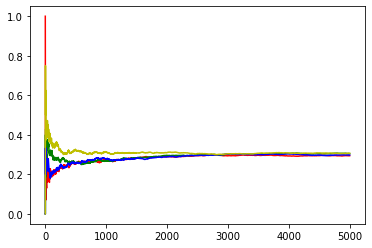

In [7]:
p3 = np.array([[7/20,3/20,1/4,1/4],[3/10,1/4,7/20,1/10],[1/4,1/4,7/20,3/20],[3/10,1/4,1/4,1/5]])

z03 = vgenmarkov(0,n,p3)
y03 = (z03 == 0).cumsum()/np.arange(1,len(z03)+1) #donne le vecteur des moyennes de 0
plt.plot(y03,'r')

z13 = vgenmarkov(1,n,p3)
y13 = (z13 == 0).cumsum()/np.arange(1,len(z13)+1) #donne le vecteur des moyennes de 0
plt.plot(y13,'g')

z23 = vgenmarkov(2,n,p3)
y23 = (z23 == 0).cumsum()/np.arange(1,len(z23)+1) #donne le vecteur des moyennes de 0
plt.plot(y23,'b')

z33 = vgenmarkov(3,n,p3)
y33 = (z33 == 0).cumsum()/np.arange(1,len(z33)+1) #donne le vecteur des moyennes de 0
plt.plot(y33,'y')

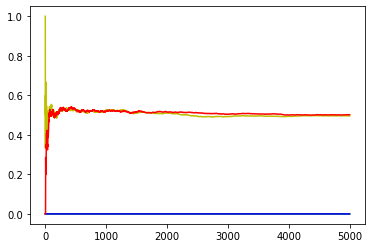

In [8]:
p4 = np.array([[1/2,0,0,0,1/2],[0,1/2,0,1/2,0],[0,0,1,0,0],[0,1/4,1/4,1/4,1/4],[1/2,0,0,0,1/2]])

z04 = vgenmarkov(0,n,p4)
y04 = (z04 == 0).cumsum()/np.arange(1,len(z04)+1) #donne le vecteur des moyennes de 0
plt.plot(y04,'y')

z14 = vgenmarkov(1,n,p4)
y14 = (z14 == 0).cumsum()/np.arange(1,len(z14)+1) #donne le vecteur des moyennes de 0
plt.plot(y14,'g')

z24 = vgenmarkov(2,n,p4)
y24 = (z24 == 0).cumsum()/np.arange(1,len(z24)+1) #donne le vecteur des moyennes de 0
plt.plot(y24,'b')

z34 = vgenmarkov(3,n,p4)
y34 = (z34 == 0).cumsum()/np.arange(1,len(z34)+1) #donne le vecteur des moyennes de 0
plt.plot(y34,'r')

## Calcul des probabilités de transition
On utilise également la  matrice de  transition $p=pt$ suivante
 

 

In [9]:
pt = np.array([[1/2,0,1/2,0],[0,1,0,0],[1/2,0,0,1/2],[0,1/2,0,1/2]])
pt

array([[0.5, 0. , 0.5, 0. ],
       [0. , 1. , 0. , 0. ],
       [0.5, 0. , 0. , 0.5],
       [0. , 0.5, 0. , 0.5]])

Utiliser la loi forte des grands nombres pour calculer, pour la matrice pt des valeurs approchées de $p^{(n)}_{2,3}, p^{(n)}_{3,3}, p^{(n)}_{1,4}$ pour les valeurs de n suivantes $n=2,5,10, 20$. Par exemple, vous faites N=1000 (ou N=10000, ou N=50000) simulations de la chaîne de Markov issue de 2, puis vous comptez la proportion de fois où vous observez la valeur $3$

In [10]:
N = 10000

def p_xy_emp(x,n,p,y,N):
    c = 0
    for i in range(N):
        etat = genmarkov(x,n,p)
        if(etat == y):
            c += 1
    X_barre = c/N
    return(X_barre)

print("Pour la matrice pt :")
for n in [2,5,10,20]:
    print("Pour n = " + str(n) + ": p23 = " + str(p_xy_emp(1,n,pt,2,N)) 
          + ", p33 = " + str(p_xy_emp(2,n,pt,2,N)) + ", p14 = " + str(p_xy_emp(0,n,pt,3,N)))

Pour la matrice pt :
Pour n = 2: p23 = 0.0, p33 = 0.0, p14 = 0.0
Pour n = 5: p23 = 0.0, p33 = 0.1292, p14 = 0.2488
Pour n = 10: p23 = 0.0, p33 = 0.0404, p14 = 0.11
Pour n = 20: p23 = 0.0, p33 = 0.0048, p14 = 0.0132


Vérifier vos simulations  en utilisant le calcul matriciel. Sous Python, le produit matriciel des matrices p et q s'écrit np.dot(p,q) ce qui est très différent de $p*q$. Ecrivez une fonction puis(p,n) qui renvoie la matrice $p^n$. (Vous pouvez utiliser un algorithme de calcul rapide de
puissance si vous savez le coder).

In [11]:
def puis(x,n,p,y):
    N = len(p)
    A = np.zeros(N)
    A[x] = 1
    return np.dot(np.transpose(A), np.linalg.matrix_power(p,n))[y]

print("Pour la matrice pt :")
for n in [2,5,10,20]:
    print("Pour n = " + str(n) + ": p23 = " + str(puis(1,n,pt,2)) 
          + ", p33 = " + str(puis(2,n,pt,2)) + ", p14 = " + str(puis(0,n,pt,3)))

Pour la matrice pt :
Pour n = 2: p23 = 0.0, p33 = 0.25, p14 = 0.25
Pour n = 5: p23 = 0.0, p33 = 0.09375, p14 = 0.21875
Pour n = 10: p23 = 0.0, p33 = 0.033203125, p14 = 0.0859375
Pour n = 20: p23 = 0.0, p33 = 0.003987312316894531, p14 = 0.010437965393066406


## Calcul de probabilités et de temps d'absorption
Premièrement, en utilisant la structure de classes, décrire les 3
comportements asymptotiques possibles pour la chaîne de Markov de
matrice de transition



In [12]:
p = np.array([[1,0,0,0,0],[0,1,0,0,0],[3/20,1/10,3/10,1/5,1/4],[1/5,3/20,3/20,7/20,3/20],[0,0,0,0,1]])
p

array([[1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.15, 0.1 , 0.3 , 0.2 , 0.25],
       [0.2 , 0.15, 0.15, 0.35, 0.15],
       [0.  , 0.  , 0.  , 0.  , 1.  ]])

<font color='blue'>
Les 3 comportements asymptotiques possibles sont la stationnarité en {1}, {2} et {5} car ce sont des états fermés et que la probabilité d'atteindre ces états depuis la classe ouverte {3,4} est non nulle.
</font>

En utilisant la loi forte des grands nombres, calculer une valeur approchée de la probabilité que la chaîne de Markov, issue de 4, réussisse à atteindre l'état 2.


<font color='blue'>
La probabilité que la chaîne de Markov issue de 4 réussisse à atteindre l'état 2 est d'environ 0.282.
</font>

In [13]:
n = 30
N = 10000

p42_emp = p_xy_emp(3,n,p,1,N)
print(p42_emp)

p42_theo = puis(3,n,p,1)
print(p42_theo)

0.2851
0.28235294093698765


Essayons maintenant de répondre à la même question en utilisant le
calcul matriciel.  Ecrire la matrice de la chaîne absorbee $\tilde{P}$
sous la forme canonique 
$$\tilde{P}=
\begin{pmatrix}
  Q & R \\ 0 & I
\end{pmatrix}
$$
Puis utiliser la fonction  np.linalg.inv pour calculer
$N=(I-Q)^{-1}$ et enfin retrouver le calcul précédent de la
probabilité d'absorption en 2 lorsque l'on part de 4.

In [14]:
Ptilde = [[0.3,0.2,0.15,0.1,0.25],[0.15,0.35,0.2,0.15,0.15],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]
Q = [[0.3,0.2],[0.15,0.35]]
I = np.identity(2)
R = [[0.15,0.1,0.25],[0.2,0.15,0.15]]
N = np.linalg.inv(I-Q)
N
# les lignes de B sont les états desquels on part, soit 3 et 4
# les colonnes sont les états absorbants soit 1,2 et 5
B = np.dot(N,R)
p42_mat = B[1,1]
print(p42_mat)

0.2823529411764706


<font color='blue'>
La probabilité d'absorption en 2 quand on part de 4 est bien de 0.282.
</font>

## Détermination de probabilités invariantes
On peut chercher les valeurs et vecteurs propres de la matrice pla

In [15]:
np.linalg.eig(pla)

(array([0.4, 1. ]), array([[-0.98058068, -0.70710678],
        [ 0.19611614, -0.70710678]]))

N'oublions pas que le vecteur $\mathbf{1}$ dont toutes les coordonnées sont des $1$ est un vecteur propre avec la valeur propre 1.
Ici nous cherchons une probabilité invariante, i.e. un vecteur propre à gauche. Il faut donc déterminer le spectre de la transposée

In [16]:
v,w = np.linalg.eig(pla.T)

In [17]:
v

array([0.4, 1. ])

In [18]:
w

array([[-0.70710678, -0.19611614],
       [ 0.70710678, -0.98058068]])

Il faut faire attention lorsque l'on compare des valeurs numériques

In [19]:
np.sqrt(2)*np.sqrt(2) == 2.0


False

Pour comparer, à la précision de la machine utilisée,

In [20]:
np.isclose(np.sqrt(2)*np.sqrt(2), 2.0)

True

Ecrire une fonction probinv(p)
qui prenne en paramètre une matrice stochastique $p$ et qui retourne une probabilité invariante pour $p$. N'oubliez pas de normaliser le vecteur propre pour obtenir une probabilité.

Tester cette fonction avec $pla$ et la matrices de transition $pt$ et
celle de l'exercice $4.10$.

In [21]:
# matrice stochastique p
def probinv(p):
    w, v = np.linalg.eig(p.T)
    v1 = v[:,np.isclose(w, 1)]
    v1 = v1[:,0]
    PI = v1 / v1.sum()
    PI = PI.real
    return(PI)

pi_pla = probinv(pla)
print("La probabilité invariante pour pla est : ", pi_pla)
print(np.isclose(np.dot(pi_pla,pla), pi_pla))

pi_pt = probinv(pt)
print("La probabilité invariante pour pla est : ", pi_pt)
print(np.isclose(np.dot(pi_pt,pt), pi_pt))

La probabilité invariante pour pla est :  [0.16666667 0.83333333]
[ True  True]
La probabilité invariante pour pla est :  [0. 1. 0. 0.]
[ True  True  True  True]


## Le théorème ergodique
Rappelez les conditions d'application de ce théorème. Indiquez pour chacun des exercices $4.7,4.12$ si vous avez le droit de l'appliquer et faites le, éventuellement, pour répondre aux  questions de ces exercices. 

Vous devez déterminer la/les probabilités invariantes, la fonction $f$ dont vous prenez la moyenne temporelle (c'est un vecteur de la bonne dimension) et calculer la moyenne $<f,\pi>$.


<font color='blue'>
Théorème ergodique : Soit X une chaine irréductible positive récurrente. Alors, pour toute fonction f positive ou bornée, presque sûrement : $\frac{1}{n} \sum_{k=1}^{n} f\left(X_{k}\right) \rightarrow \pi(f)$
</font>

<font color='blue'>
Dans l'exercice 4.7, la chaîne de Markov est irréductible car tous les états communiquent. Tous les états sont récurrents positifs car l'espérance du temps de premier retour en un état duquel on est parti est finie.
On peut donc appliquer le théorème ergodique en l'appliquant à la fonction positive : $f(X_{k}) = 1_{(X_{k} \ge 2)} = 1 - 1_{(X_{k} = 1)}$
Numériquement, on trouve $\pi(f) = 0.625$
</font>

In [22]:
p7 = np.array([[2/3,0,1/3],[1/3,1/3,1/3],[0,1,0]])

def f7(p):
    s = 0
    for i in range(len(p)):
        if(i>=1):
            s += p[i]
    return(s)

f7(probinv(p7))

0.6250000000000006

<font color='blue'>
Dans l'exercice 4.12, la chaîne de Markov est irréductible et les états sont récurrents positifs. On peut donc appliquer le théorème ergodique en l'appliquant aux fonctions positives : $f(X_{k}) = X_{k}$ et $g(X_{k}) = X_{k}^{2}$. Numériquement, on trouve $\pi(f) = 2.1$ et $\pi(g) = 5.3$
</font>

In [23]:
p12 = np.array([[0,1,0,0],[1/2,0,1/4,1/4],[1/2,1/2,0,0],[0,0,1,0]])
p12

def f12(p):
    s = 0
    for i in range(len(p)):
        s += (i+1)*p[i]
    return(s)

f12(probinv(p12))

2.1

In [24]:
def g12(p):
    s = 0
    for i in range(len(p)):
        s += ((i+1)**2)*p[i]
    return(s)

g12(probinv(p12))

5.299999999999999

## Le théorème de convergence vers l'équilibre

Relire attentivement l'énoncé de ce théorème.

Indiquer, pour la matrice $pla$ et celle de l'exercice 4.17, vers quelle matrice $P^\infty$  doit converger $P^n$ quand $n\to \infty$. 

Vérifier, dans ces deux cas,  que la décroissance d'une distance entre $P^n$ et $P^\infty$ est en $\rho^n$ avec $\rho \in ]0,1[$. Comparer la valeur de $\rho$ trouvée expérimentalement et la valeur théorique donnée par le théorème de Perron Frobenius.


<font color='blue'>
Théorème de convergence vers l'équilibre - Soit une chaîne de Markov irréductible positive récurrente de proba invariante $\pi$ et apériodique. Alors, pour toute loi initiale :
$\mathbb{P}(X_{n}=i) \rightarrow \pi(i)$
en particulier pour tout i :
$p_{i j}^{(n)} \rightarrow \pi(j)$
</font>

In [25]:
def distance(p,q):
    r=(p-q)**2
    return(np.sqrt(r.sum()))
distance(p7,p7)

0.0

<font color='blue'>
La chaîne de Markov de la matrice pla est irréductible positive récurrente et apériodique. On peut donc appliquer le théorème de Perron Frobenius qui assure l'existence d'une constante C > 0 telle que :
$\quad\left\|P^{n}-P^{\infty}\right\| \leq C \rho^{n}$
avec $\rho=\sup |\lambda|: \lambda \in \operatorname{sp}(P), \lambda \neq 1<1:$ c'est-à-dire la convergence est exponentiellement rapide.
</font>

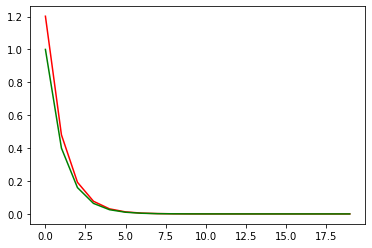

In [26]:
pla_inf = np.array([probinv(pla) for i in range(len(pla))])

v = list(np.linalg.eig(pla)[0])
i = 0
while (np.isclose(np.linalg.eig(pla)[0][i],1.0) == False):
    i += 1
del v[i]
rho_theo = max([abs(elt) for elt in v])

N = 20
#Convergence de Pn-Pinf
L = []
for i in range(N):
    L.append(distance(pla_inf, np.linalg.matrix_power(pla,i)))
plt.plot(L,'r')

#Convergence de C*rho^n
L2 = []
for j in range(N):
    L2.append(rho_theo**j)
plt.plot(L2,'g')

<font color='blue'>
La chaîne de Markov de la matrice P de l'exercice 4.17 est irréductible positive récurrente et apériodique. On peut donc appliquer le théorème de Perron Frobenius qui assure l'existence d'une constante C > 0 telle que :
$\quad\left\|P^{n}-P^{\infty}\right\| \leq C \rho^{n}$
avec $\rho=\sup |\lambda|: \lambda \in \operatorname{sp}(P), \lambda \neq 1<1:$ c'est-à-dire la convergence est exponentiellement rapide.
</font>

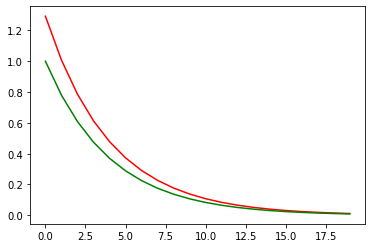

In [27]:
p17 = np.array([[0.98,0.02],[0.2,0.8]])
p17_inf = np.array([probinv(p17) for i in range(len(p17))])

v = list(np.linalg.eig(p17)[0])
i = 0
while (np.isclose(np.linalg.eig(p17)[0][i],1.0) == False):
    i += 1
del v[i]
rho_theo = max([abs(elt) for elt in v])

N = 20
#Convergence de Pn-Pinf
L = []
for i in range(N):
    L.append(distance(p17_inf, np.linalg.matrix_power(p17,i)))
plt.plot(L,'r')

#Convergence de C*rho^n
L2 = []
for j in range(N):
    L2.append(rho_theo**j)
plt.plot(L2,'g')

## Page Rank
Considérons 6 pages web dont les liens sont donnés par le graphe suivant.
Simuler un marcheur qui choisit une page uniformément  parmi les liens
possibles. Que se passe-t-il ? Pouviez vous le prévoir ?

On rajoute du damping $\alpha\in (0,1)$ ie de l'exploration $1-\alpha$ : a chaque étape
le marcheur en $x$  choisit un des $d_x$ liens possibles avec la probabilité
$\frac{\alpha}{d_x}$ et choisit une page au hasard dans tout le web
avec la probabilité $1-\alpha$. Pourquoi y a-t-il une unique mesure
invariante ? Trouver la mesure invariante pour
$\alpha=0.5$ et $\alpha=0.85$. En déduire la page la plus importante
dans les deux cas. Commentez.

Commandes Python : np.full


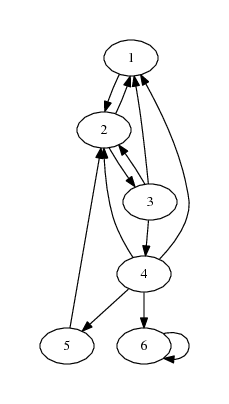

In [28]:
from IPython.display import Image

fig = Image(filename=('./graphepr.png'))
fig

<font color='blue'>
On simule un marcheur qui choisit une page uniformément parmi les liens possibles. Au bout d'un grand nombre de changement d'état, il est bloqué à l'état 6. On pouvait le prévoir car l'état 6 ne communique avec personne qu'autre que lui-même.
    
</font>

In [29]:
pweb = np.array([[0,1,0,0,0,0],[1/2,0,1/2,0,0,0],[1/3,1/3,0,1/3,0,0],[1/4,1/4,0,0,1/4,1/4],[0,1,0,0,0,0],[0,0,0,0,0,1]])
pweb
n = 100000
pweb_n = np.linalg.matrix_power(pweb,n)
print(pweb_n)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


<font color='blue'>
On rajoute du damping $\alpha\in (0,1)$
Il y a une unique mesure invariante car c'est une chaîne de Markov irréductible sur un ensemble d'états finis.
</font>

In [30]:
a = 0.5
pweb_alpha = np.array([[(1-a)/5,a,(1-a)/5,(1-a)/5,(1-a)/5,(1-a)/5],[a/2,(1-a)/4,a/2,(1-a)/4,(1-a)/4,(1-a)/4],
              [a/3,a/3,(1-a)/3,a/3,(1-a)/3,(1-a)/3],[a/4,a/4,(1-a)/2,(1-a)/2,a/4,a/4],
              [(1-a)/5,a,(1-a)/5,(1-a)/5,(1-a)/5,(1-a)/5],[(1-a)/5,(1-a)/5,(1-a)/5,(1-a)/5,(1-a)/5,a]])
pweb_alpha

array([[0.1       , 0.5       , 0.1       , 0.1       , 0.1       ,
        0.1       ],
       [0.25      , 0.125     , 0.25      , 0.125     , 0.125     ,
        0.125     ],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.125     , 0.125     , 0.25      , 0.25      , 0.125     ,
        0.125     ],
       [0.1       , 0.5       , 0.1       , 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.5       ]])

In [31]:
probinv(pweb_alpha)

array([0.14864458, 0.22771084, 0.16581325, 0.1373494 , 0.12018072,
       0.2003012 ])

In [32]:
a = 0.85
pweb_alpha = np.array([[(1-a)/5,a,(1-a)/5,(1-a)/5,(1-a)/5,(1-a)/5],[a/2,(1-a)/4,a/2,(1-a)/4,(1-a)/4,(1-a)/4],
              [a/3,a/3,(1-a)/3,a/3,(1-a)/3,(1-a)/3],[a/4,a/4,(1-a)/2,(1-a)/2,a/4,a/4],
              [(1-a)/5,a,(1-a)/5,(1-a)/5,(1-a)/5,(1-a)/5],[(1-a)/5,(1-a)/5,(1-a)/5,(1-a)/5,(1-a)/5,a]])

In [33]:
probinv(pweb_alpha)

array([0.18946897, 0.27699458, 0.14557357, 0.07220534, 0.0481664 ,
       0.26759114])

<font color='blue'>
Pour $\alpha$ = 0.5 comme pour $\alpha$ = 0.85, la page la plus importante est la deuxième page.